<a href="https://colab.research.google.com/github/JonathanTeklu/ML-stock-price-predictions/blob/main/is427_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp /root/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d marianadeem755/amazon-stockamzn-datasetinnovation-and-growth

Dataset URL: https://www.kaggle.com/datasets/marianadeem755/amazon-stockamzn-datasetinnovation-and-growth
License(s): apache-2.0


In [ ]:
!unzip amazon-stockamzn-datasetinnovation-and-growth.zip -d /content/

Archive:  amazon-stockamzn-datasetinnovation-and-growth.zip
  inflating: /content/AMZN.csv       


The code above downloads kaggle into colab and opens the dataset from the URL

In [ ]:
import pandas as pd

df = pd.read_csv('/content/AMZN.csv')
print(df.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2023-07-03  130.820007  131.850006  130.070007  130.220001  130.220001   
1  2023-07-05  130.240005  131.399994  129.639999  130.380005  130.380005   
2  2023-07-06  128.250000  128.729996  127.370003  128.360001  128.360001   
3  2023-07-07  128.589996  130.970001  128.130005  129.779999  129.779999   
4  2023-07-10  129.070007  129.279999  125.919998  127.129997  127.129997   

     Volume  
0  28264800  
1  35895400  
2  40639900  
3  41928700  
4  61889300  


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt

df.dropna() - removes rows with missing data
df.fillna() - fills missing values with NULL
df.dropduplicates() - removes duplicate data

In [ ]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300
...,...,...,...,...,...,...,...
247,2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900
248,2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500
249,2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200
250,2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000


In [ ]:
df.fillna('NULL')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300
...,...,...,...,...,...,...,...
247,2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900
248,2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500
249,2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200
250,2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000


In [ ]:
df.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300
...,...,...,...,...,...,...,...
247,2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900
248,2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500
249,2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200
250,2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,156.341865,157.982817,154.708691,156.451826,156.451826,4.754280e+07
std,21.876892,22.039902,21.742540,21.948251,21.948251,1.776402e+07
min,120.629997,121.639999,118.349998,119.570000,119.570000,2.237840e+07
25%,135.365006,137.330005,134.024998,135.360001,135.360001,3.694968e+07
50%,152.415001,153.930000,151.294999,152.639999,152.639999,4.407735e+07
75%,178.135002,180.035000,176.447502,178.442497,178.442497,5.296302e+07
max,197.729996,200.429993,195.929993,200.000000,200.000000,1.529387e+08


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


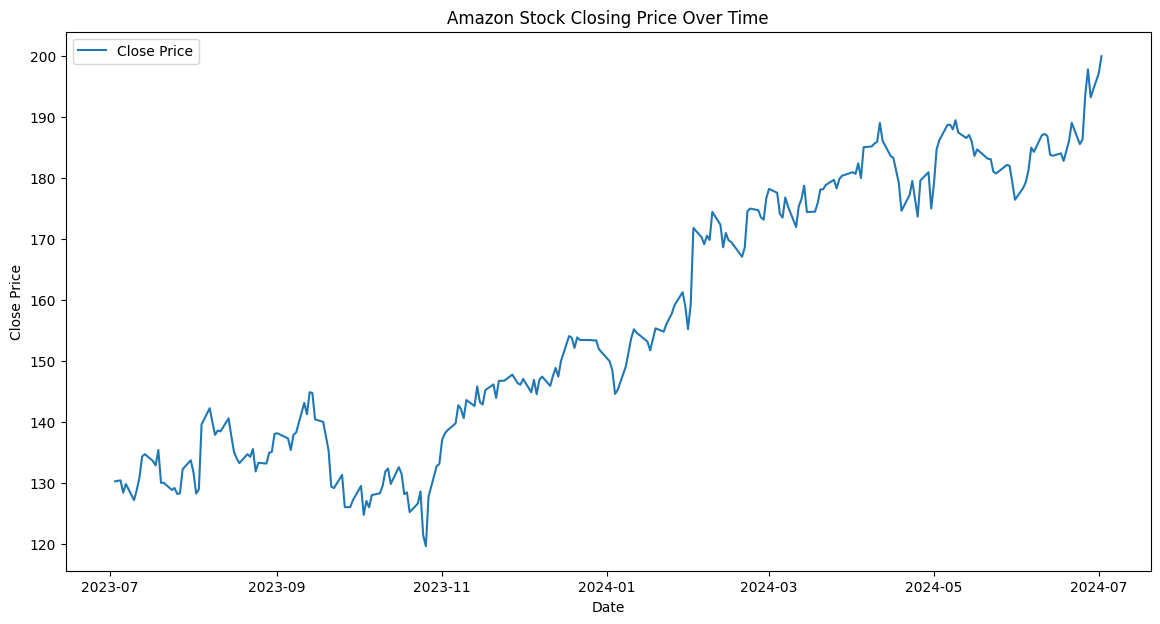

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Amazon Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

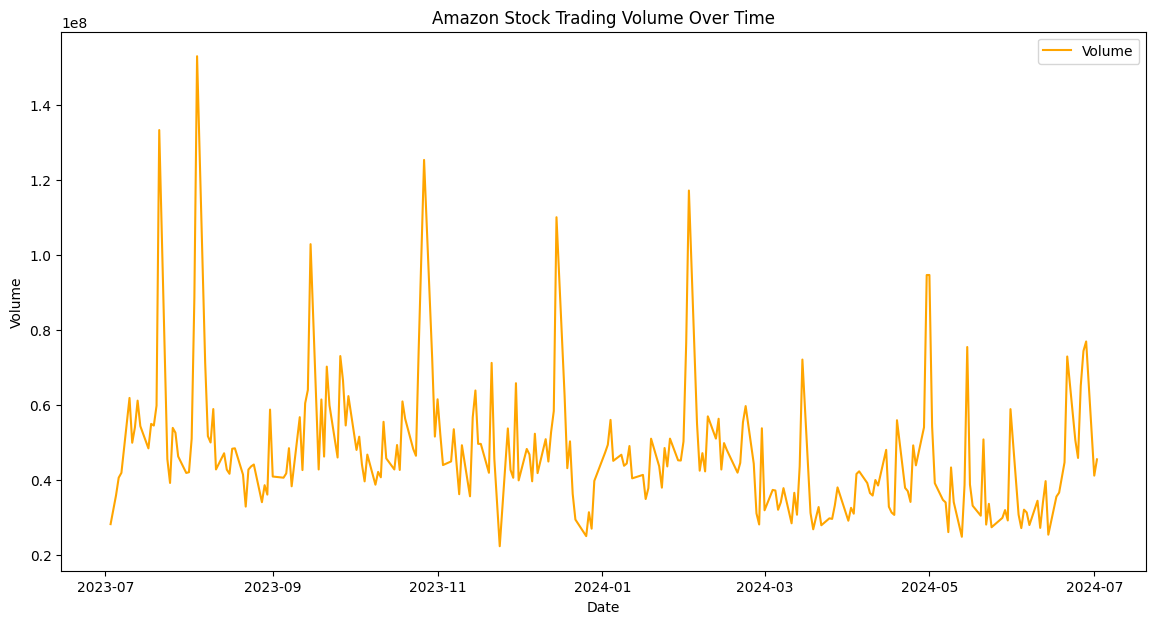

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume', color='orange')
plt.title('Amazon Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

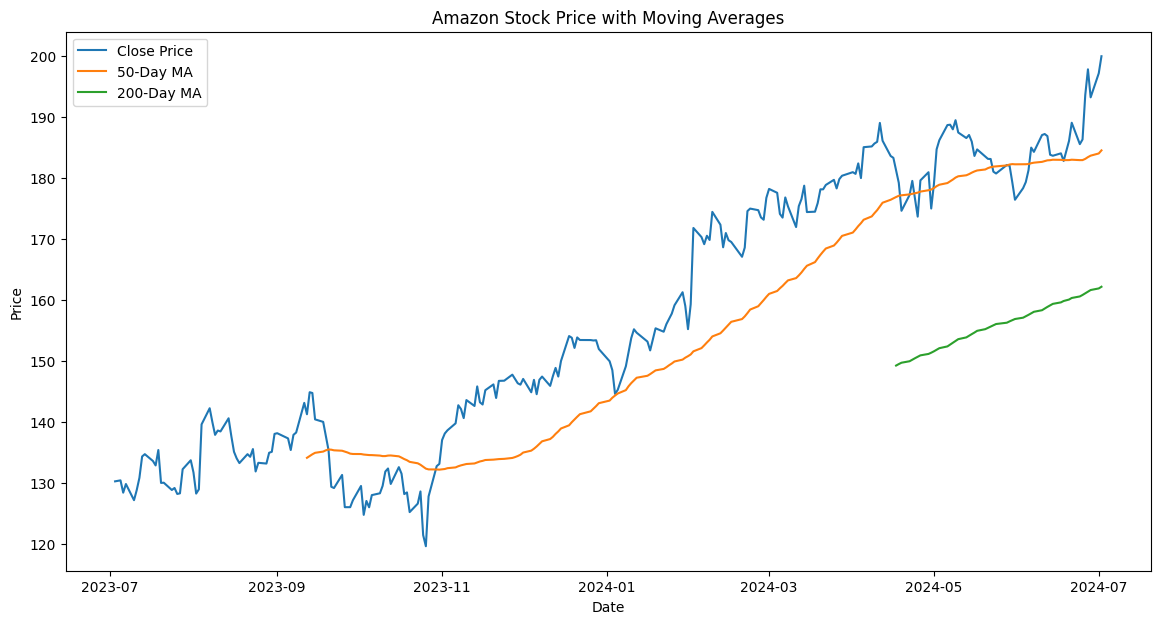

In [ ]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title('Amazon Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']].dropna()
y = df['Close'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42, 6) (11, 6) (42,) (11,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2742915900618468
R-squared: 0.962113737599894


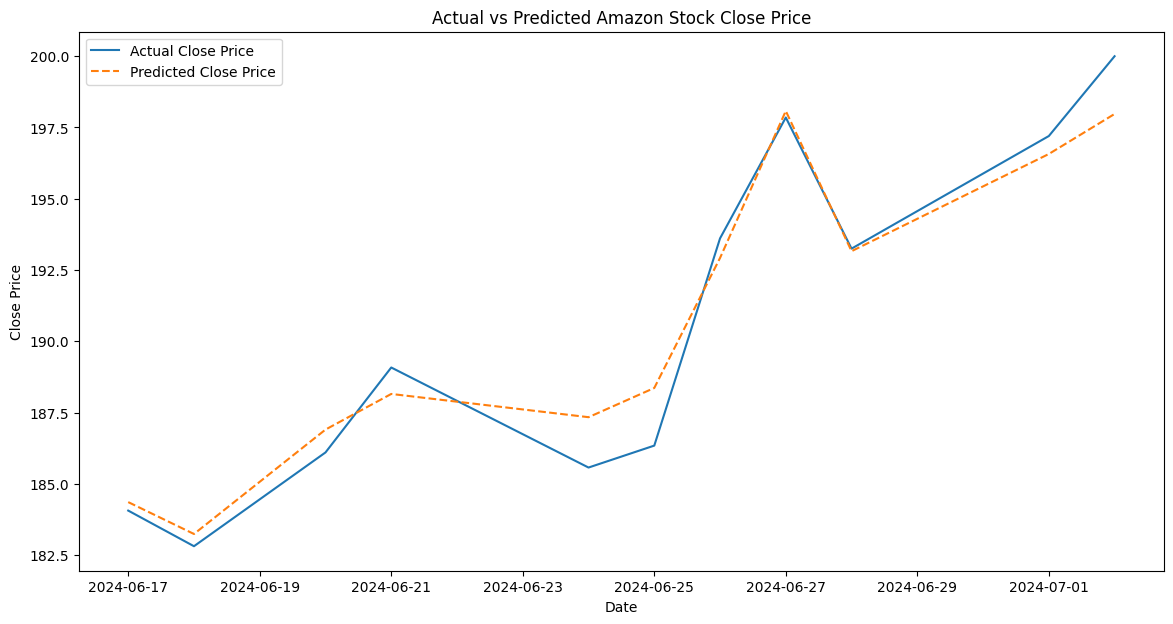

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', linestyle='--')
plt.title('Actual vs Predicted Amazon Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
latest_data = df[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']].iloc[-1:].dropna()

future_pred = model.predict(latest_data)
print(f'Predicted future close price: {future_pred[0]}')

Predicted future close price: 197.97445290390107


The bottom code blocks are just random testing I was playing with

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 3: Train a regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 36.851497629820784


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example dataset of game states (simplified)
# Each row represents a board state, and the last column is the best move
# '0' = empty, '1' = player 'O', '2' = player 'X'
data = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 4],  # Best move is position 4
    [1, 2, 0, 0, 1, 0, 2, 0, 0, 6],  # Best move is position 6
    [2, 1, 2, 0, 1, 0, 0, 2, 0, 3],  # Best move is position 3
    [1, 1, 2, 2, 1, 0, 0, 2, 0, 5],  # Best move is position 5
    # Add more rows with possible board states
])

# Split into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Predict the best move for a given board state
test_board = [1, 2, 0, 0, 1, 0, 2, 0, 0]  # Example board state
best_move = model.predict([test_board])
print(f"Predicted best move: {best_move[0]}")


Accuracy: 0.0
Predicted best move: 4


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 2: Load and Preprocess the Kaggle Dataset
df = pd.read_csv('/content/AMZN.csv')  # Path to the dataset
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use 'Close' price for prediction
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Create sequences for CNN
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])  # Previous sequence_length values
        y.append(data[i])  # Target value
    return np.array(X), np.array(y)

sequence_length = 60  # Use 60 days of data to predict the next day
X, y = create_sequences(data, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Design the CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for the predicted price
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluate and Predict
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict the next day price
latest_sequence = X_test[-1].reshape(1, sequence_length, 1)  # Use the last sequence in the test set
predicted_price = model.predict(latest_sequence)
predicted_price = scaler.inverse_transform(predicted_price)  # Reverse scaling
print(f'Predicted next day close price: {predicted_price[0][0]}')


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.2020 - val_loss: 0.0649
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0515 - val_loss: 0.0095
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0179 - val_loss: 0.0165
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0119 - val_loss: 0.0107
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - val_loss: 0.0089
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0095 - val_loss: 0.0116
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0089 - val_loss: 0.0092
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0082 - val_loss: 0.0084
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0073 - val_loss: 0.0096
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0069 - val_loss: 0.0074
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0066 - val_loss: 0.0073
E